<a href="https://colab.research.google.com/github/tamnhu2913/BCG-DataScience/blob/main/Task4_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from google.colab import drive
drive.mount('/content/drive')

sns.set(color_codes = True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Science/Data/data_for_predictions.csv')
data = data.drop(columns= ['Unnamed: 0'])
data.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


# Split data

In [ ]:
X = data.drop(columns = ['id', 'churn'])
y = data['churn']
print(X.shape, y.shape)

(14606, 61) (14606,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(10954, 61) (10954,) (3652, 61) (3652,)


# Model prediction

In [ ]:
model = RandomForestClassifier(n_estimators = 1000, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

# Model evaluation

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.85      0.05      0.09       366

    accuracy                           0.90      3652
   macro avg       0.88      0.52      0.52      3652
weighted avg       0.90      0.90      0.86      3652



- Based on this table, the accuracy score is 0.9, which seems very high. However, accuracy alone is not sufficient to evaluate the performance of a classification model.
- We need more 2 metrics to conclude whether the model performs well on the data: the precision score and the recall score.
- Looking at the precision, 85% represents the percentage of true positives out of all predicted positives, but this could be improved.
- However, looking at the recall score, it is very low. The model only correctly predicts 5% of the actual true positives.

The accuracy is : 0.9036144578313253


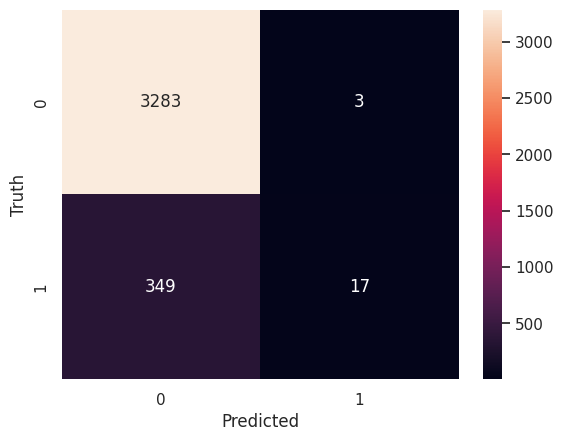

In [ ]:
print('The accuracy is :', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

- Looking at the true negative (the left box above): there are 3283 out of 3286. This means that we predicted 3283 as the negative case (churn = 0).
- At the false negative (the left box below): This is the number of false predict, where we've predicted that a client will not churn (churn = 0), but in reality, the client has churned (churn = 1). This is quit high at 349, but we want to get the false negative closely to 0.
- For predicted positive, the false positive (the right box above) is quite great with only 3 predictions.
- However, the number of true positives (the right box below) is much lower than expected. Out of 366 clients who actually churned in the test set, we only predicted that 17 clients would churn. This result is quite poor.

# Model understanding

In [ ]:
feature_important = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index(drop=True)
print(feature_important)

                                    features  importance
0         peak_mid_peak_fix_max_monthly_diff    0.001140
1                   forecast_discount_energy    0.001365
2                  var_6m_price_mid_peak_fix    0.002075
3                      var_6m_price_peak_fix    0.002080
4   channel_ewpakwlliwisiwduibdlfmalxowmwpci    0.002652
..                                       ...         ...
56                        margin_net_pow_ele    0.047846
57                         forecast_cons_12m    0.048348
58                   forecast_meter_rent_12m    0.050829
59                                net_margin    0.052070
60                                  cons_12m    0.053398

[61 rows x 2 columns]


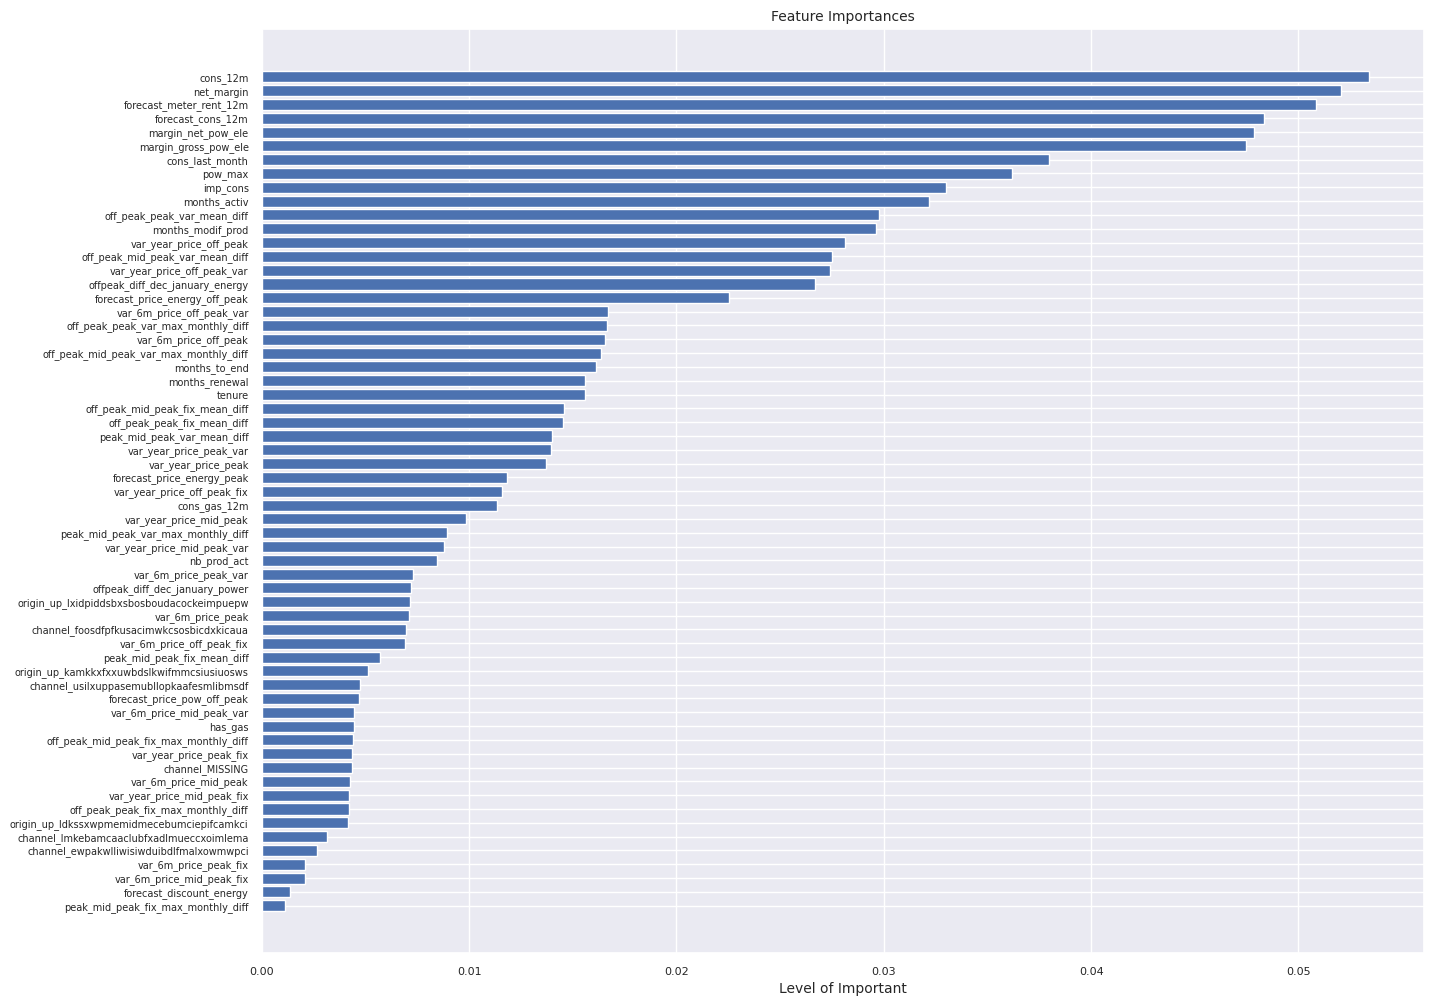

In [ ]:
plt.figure(figsize = (15,12))
plt.title('Feature Importances', fontsize = 10)
plt.barh(feature_important['features'], feature_important['importance'], align = 'center')
plt.yticks(fontsize = 7)
plt.xticks(fontsize = 8)
plt.xlabel('Level of Important', fontsize = 10)
plt.show()

- The above graph shows that the cons_12m and net margin features have the most effect on the model.
- The margin on power subscription is also a one of top driver.
- The time features are special affects, like months_activ, months_renewal or tenure.
- One of the features that our colleague recommended is in the half-top and build.
- The price sensitivy feature are scattered around but not the main driver. Therefore, we can said that it a weak contributor.
Conlude, to arrive at our original hypothesis: ***Is churn driven by the customers' price sensitivity?*** . We need to experiment more.

In [ ]:
# Get the probability of churn (label = 1)
prob_prediction = model.predict_proba(X_test)[:,1]
print(prob_prediction)

[0.119 0.167 0.042 ... 0.173 0.056 0.101]


In [ ]:
X_test = X_test.reset_index(drop=True)

In [ ]:
X_test['prediction'] = y_pred.tolist()
X_test['prob_prediction'] = prob_prediction.tolist()
X_test.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,prediction,prob_prediction
0,4.173390,4.193598,3.165541,3.168368,0.0,2.073828,0.114667,0.099548,40.606701,1,...,0,0,1,0,0,0,0,1,0,0.119
1,4.075036,0.000000,3.003461,3.305998,30.0,1.255031,0.198096,0.000000,46.305378,0,...,0,0,1,0,0,0,0,1,0,0.167
2,3.848435,0.000000,0.000000,2.756568,0.0,1.289366,0.141434,0.000000,44.311378,0,...,0,0,1,0,0,0,0,1,0,0.042
3,4.345433,0.000000,0.000000,3.516690,0.0,1.304921,0.142996,0.000000,44.311378,0,...,0,0,1,0,0,0,0,1,0,0.084
4,4.185655,0.000000,3.355834,3.208148,0.0,2.123067,0.120372,0.103487,40.606701,0,...,0,0,1,0,0,0,1,0,0,0.030


In [ ]:
X_test.to_csv('out_of_sample_data_with_predictions.csv')